In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
shipData=pd.read_csv('F:/Simplilearn/Case_Studies/train.csv')
shipData.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
#Checking for Null Values 
shipData.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    bool 
 1   Survived     891 non-null    bool 
 2   Pclass       891 non-null    bool 
 3   Name         891 non-null    bool 
 4   Gender       891 non-null    bool 
 5   Age          891 non-null    bool 
 6   SibSp        891 non-null    bool 
 7   Parch        891 non-null    bool 
 8   Ticket       891 non-null    bool 
 9   Fare         891 non-null    bool 
 10  Cabin        891 non-null    bool 
 11  Embarked     891 non-null    bool 
dtypes: bool(12)
memory usage: 10.6 KB


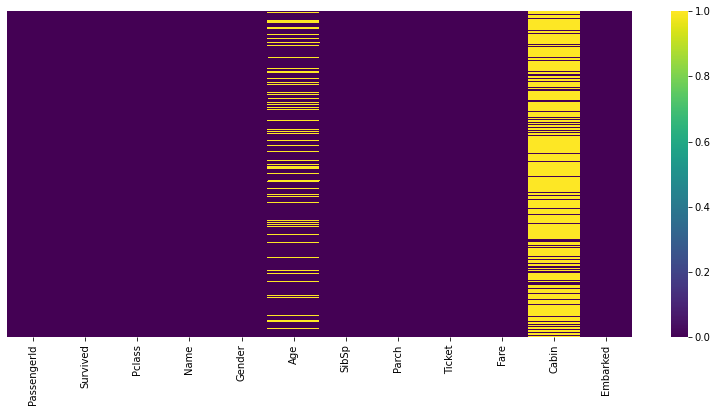

In [60]:
#Performing EDA
plt.figure(figsize=(14,6))
sns.heatmap(shipData.isnull(),yticklabels=False,cmap='viridis')


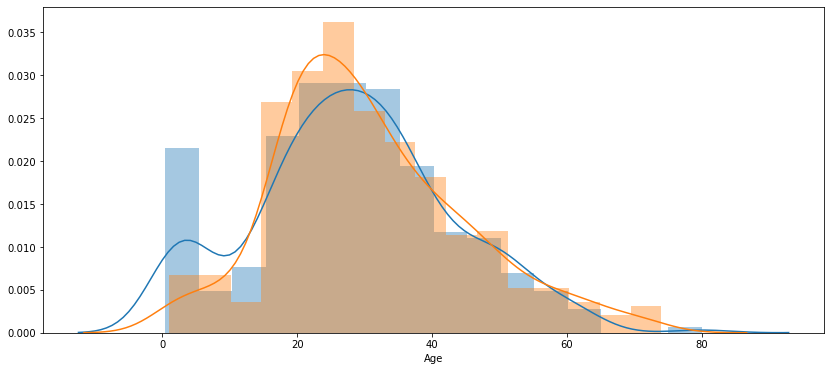

In [61]:
#checking for age data
ageYes=shipData[shipData.Survived==1]['Age']
ageNo=shipData[shipData.Survived==0]['Age']
plt.figure(figsize=(14,6))
sns.distplot(ageYes,label='Survived=1')
sns.distplot(ageNo,label='Survived=0')

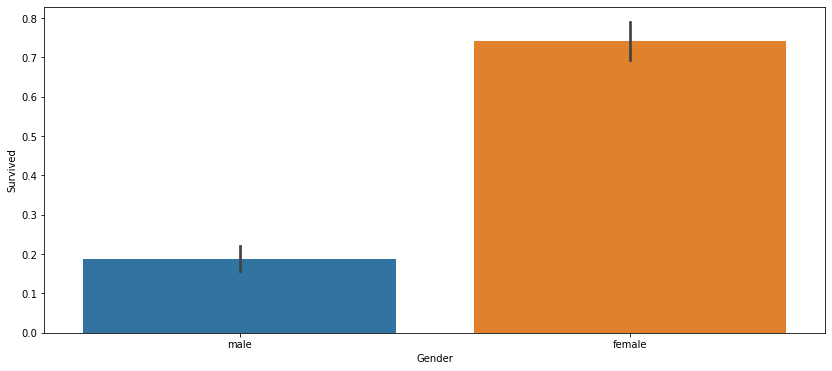

In [62]:
#checking if gender is impacting or not
plt.figure(figsize=(14,6))
sns.barplot(x='Gender',y='Survived',data=shipData)

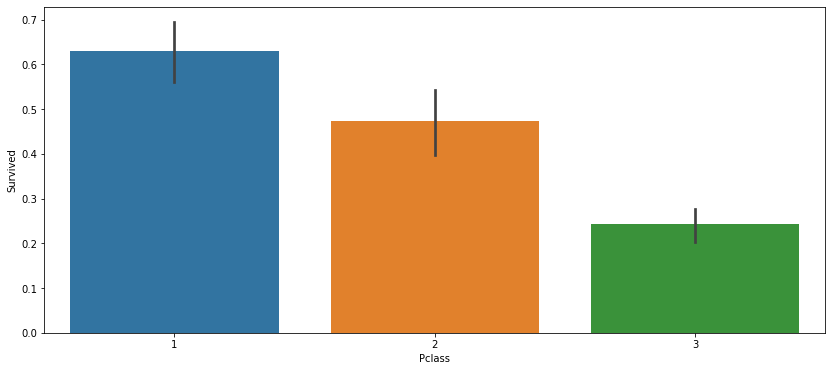

In [63]:
#Checking is classs is impacting or not
plt.figure(figsize=(14,6))
sns.barplot(x='Pclass',y='Survived',data=shipData)

In [35]:
#getting Title
def getTitle(name):
    if "." not in name:
        return("No Title")
    else:
        return(name.split(",")[1].split(".")[0].strip())

shipData['Title']=shipData.Name.apply(getTitle)

shipData.groupby('Title').Age.agg(['mean','median','count'])

,mean,median,count
Title,,,
Capt,70.000000,70.0,1
Col,58.000000,58.0,2
Don,40.000000,40.0,1
Dr,42.000000,46.5,6
Jonkheer,38.000000,38.0,1
Lady,48.000000,48.0,1
Major,48.500000,48.5,2
Master,4.574167,3.5,36
Miss,21.773973,21.0,146


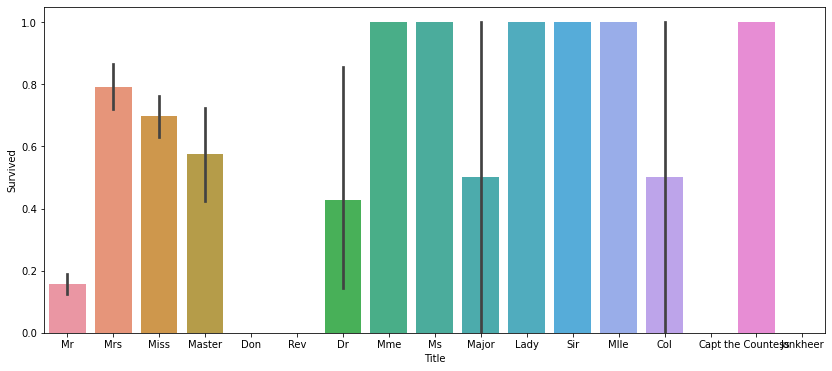

In [66]:
#getting Title
shipData['Title']=shipData.Name.apply(getTitle)
shipData.groupby('Title').Age.agg(['mean','median','count'])
shipData['Age']=shipData.groupby('Title')['Age'].apply(lambda x : x.fillna(x.median()))
shipData.isna().any()
#Checking is Title  is impacting or not
plt.figure(figsize=(14,6))
sns.barplot(x='Title',y='Survived',data=shipData)

In [68]:
#dropping Cabin as having max nulls 
shipData.Cabin.isna().value_counts
ship_Data_new=shipData.drop(columns=['PassengerId',"Name",'Ticket','Cabin'])
ship_Data_new.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [69]:
#drop missing value rows
ship_Data_new.dropna(inplace=True)

In [70]:
#Checking the total counts of each title and  merging the least numbers of titles in one column 
ship_Data_new.Title.unique()
ship_Data_new.Title.value_counts()
final_title=ship_Data_new.Title.value_counts()[ship_Data_new.Title.value_counts()>=40].index

In [73]:
#Creating new Coloum  as we grouped the othere not title with least counts in as one  name 'Others' and
ship_Data_new['Title']=np.where(ship_Data_new.Title.isin(final_title),ship_Data_new.Title,'others')

In [75]:
ship_Data_new=ship_Data_new.drop(columns=['New_Title'])

In [76]:
ship_Data_new.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


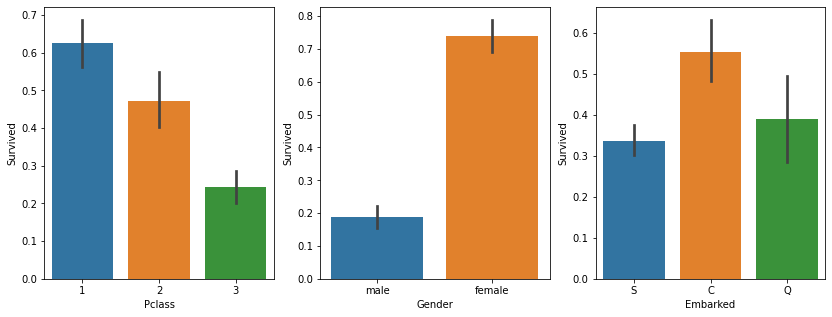

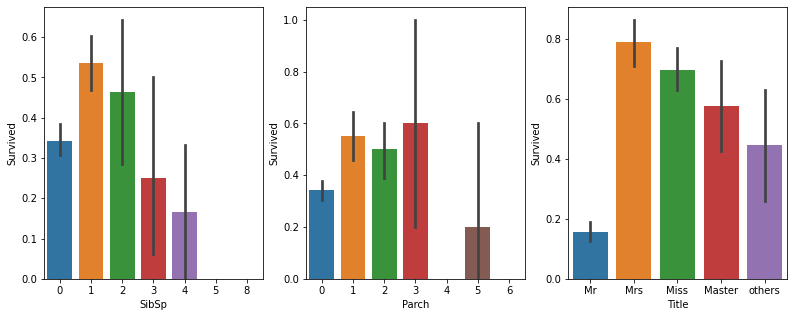

In [86]:
#EDA on new data
plt.figure(figsize=(14,5))
plt.subplot(131)
sns.barplot(x=ship_Data_new.Pclass,y=ship_Data_new.Survived)
plt.subplot(132)
sns.barplot(x=ship_Data_new.Gender,y=ship_Data_new.Survived)
plt.subplot(133)
sns.barplot(x=ship_Data_new.Embarked,y=ship_Data_new.Survived)
plt.figure(figsize=(18,5))
plt.subplot(141)
sns.barplot(x=ship_Data_new.SibSp,y=ship_Data_new.Survived,data=ship_Data_new)
plt.subplot(142)
sns.barplot(x=ship_Data_new.Parch,y=ship_Data_new.Survived)
plt.subplot(143)
sns.barplot(x=ship_Data_new.Title,y=ship_Data_new.Survived)
plt.show()

In [88]:
#Getting Dummy values 
ship_Data_new=pd.get_dummies(data=ship_Data_new,columns=['Title','Gender','Embarked'],drop_first=True)

In [96]:
#feature Scaling 
x=ship_Data_new.iloc[:,1:]
y=ship_Data_new.Survived

In [97]:
#Splitting the data in Train ,Test
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [105]:
#Standardaizing the data  and Fitting it in x_train and x_test
from sklearn.preprocessing import StandardScaler
estimator_stdc=StandardScaler()
estimator_stdc.fit(x_train)
estimator_stdc.fit(x_test)
x_train_stdc=estimator_stdc.transform(x_train)
x_test_stdc=estimator_stdc.transform(x_test)

In [108]:
#Performing Logistic regression 
from sklearn.linear_model import LogisticRegression
estimator_lr=LogisticRegression()
estimator_lr.fit(x_train_stdc,y_train)
print("Train Score for Logistic_Regression --->",estimator_lr.score(x_train_stdc,y_train))
print("Test Score for Logistic_Regression --->",estimator_lr.score(x_test_stdc,y_test))
        

Train Score for Logistic_Regression ---> 0.8483483483483484
Test Score for Logistic_Regression ---> 0.7713004484304933


In [109]:
#Performing KNN 
from sklearn.neighbors import KNeighborsClassifier 
estimator_knn=KNeighborsClassifier(n_neighbors=11)
estimator_knn.fit(x_train_titanic_stdc,y_train_titanic)
print("Train Score for KNN --->",estimator_knn.score(x_train_stdc,y_train))
print("Test Score for KNN --->",estimator_lr.score(x_test_stdc,y_test))

Train Score for KNN ---> 0.8543543543543544
Test Score for KNN ---> 0.7713004484304933
